Q1: What is Estimation Statistics? Explain point estimate and interval estimate.
ans)

Estimation statistics is part of statistics that deals with making inferences about population parameters based on sample data. It involves estimating the value of an unknown parameter using the information gathered from a sample. 
There are two primary types of estimates in estimation statistics: point estimates and interval estimates

Point Estimation:
A point estimate is a single value that serves as an estimate of a population parameter.
    Example - the sample mean is a point estimate of the population mean (μ).

Interval Estimation:
An interval estimate provides a range of values within which the parameter is expected to lie. This range is defined by two numbers, known as the lower and upper bounds, and it is typically associated with a confidence level. The confidence level represents the degree of certainty that the interval contains the parameter


In [2]:
#Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation
#Ans)

import scipy.stats as stats
import numpy as np

def estimate_population_mean(sample_data, confidence_level=0.95):
    # Calculate sample mean and sample standard deviation
    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data, ddof=1)
    sample_size = len(sample_data)
    
    # Calculate the critical t-value for the given confidence level and sample size
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)
    
    # Calculate the margin of error
    margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
    
    # Calculate the confidence interval
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    
    return sample_mean, confidence_interval[0], confidence_interval[1]

# Example usage
sample_data = [23, 20, 25, 22, 24, 19, 21, 26, 22, 20]
point_estimate, lower_bound, upper_bound = estimate_population_mean(sample_data)
print(f"Point Estimate (Sample Mean): {point_estimate}")
print(f"Confidence Interval: ({lower_bound}, {upper_bound})")


Point Estimate (Sample Mean): 22.2
Confidence Interval: (20.554851916906493, 23.845148083093505)


Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.
ans)

Hypothesis testing is a statistical method used to make decisions or inferences about population parameters based on sample data. It involves formulating a hypothesis, collecting data, and then using statistical tests to determine whether the data supports the hypothesis or if it should be rejected.

Why Hypothesis is used:
Hypothesis testing is used to assess the evidence provided by the sample data and to make decisions about the population parameters. It helps in determining whether the observed effects are real or if they occurred by random chance. This process is fundamental in many fields, such as scientific research, economics, medicine, and engineering, where it is crucial to make informed decisions based on data.

Importance of Hypothesis Testing:
1. Decision Making: It helps in determining whether to accept or reject a hypothesis, leading to informed and evidence-based decisions.

2. Scientific Research:By testing hypotheses, researchers can validate theories, models, and assumptions, thereby advancing knowledge in various fields.

3. Quality Control: It helps in identifying defects, testing the effectiveness of new processes, and ensuring product quality.

4. Medical Research: In medical clinical trials often rely on hypothesis testing to establish the effectiveness and safety of medical interventions.

5. Policy Making:It helps researchers in making data-driven policy decisions that can lead to better outcomes.

Q4. Create a hypothesis that states whether the average weight of male college students is greater than 
the average weight of female college students.
Ans)

To create hypothesis for the given statement we can setup follow the below steps:
1. Null Hypothesis(H0) : The average weight of male college students is equal to or less than the average weight of female college students.
2. Alternative Hypothesis (H1): The average weight of male college students is greater than the average weight of female college students.

Testing Hypothesis:
1. Collect Data: Gather sample data of weights from both male and female college students.
2. Select Significance Level (α): Common choices are 0.05, 0.01, or 0.10.
3. Choose the Appropriate Test: Depending on the sample size and data distribution, a t-test (for small samples) or a z-test (for large samples) can be used.
4. Calculate Test Statistic: Compute the test statistic using the sample data.
5. Determine P-value or Critical Value: Use the test statistic to find the p-value or compare it to a critical value to make a decision.
6. Make a Decision:
    6.1 If the p-value is less than or equal to α, reject the null hypothesis.
    6.2 If the p-value is greater than α, fail to reject the null hypothesis.
7. Draw a Conclusion: Interpret the results in the context of the hypothesis.

In [4]:
# Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.
# Ans)
import numpy as np
from scipy import stats

def two_sample_t_test(sample1, sample2, alpha=0.05, alternative='two-sided'):
    # Calculate the means and standard deviations
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)
    std2 = np.std(sample2, ddof=1)
    
    # Perform the t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2, alternative=alternative)
    
    # Determine the result
    if alternative == 'two-sided':
        test_result = p_value <= alpha
    elif alternative == 'greater':
        test_result = p_value / 2 <= alpha and t_statistic > 0
    elif alternative == 'less':
        test_result = p_value / 2 <= alpha and t_statistic < 0
    
    return {
        't_statistic': t_statistic,
        'p_value': p_value,
        'test_result': test_result
    }

# Example usage
sample1 = [23, 20, 25, 22, 24, 19, 21, 26, 22, 20]  # Sample data from population 1
sample2 = [30, 28, 27, 31, 29, 32, 30, 33, 29, 28]  # Sample data from population 2

# Perform the two-sample t-test
result = two_sample_t_test(sample1, sample2, alpha=0.05, alternative='two-sided')

# Print the results
print(f"t-statistic: {result['t_statistic']}")
print(f"p-value: {result['p_value']}")
if result['test_result']:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that the means of the two populations are different.")
else:
    print("Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the means of the two populations are different.")


t-statistic: -7.969908903477913
p-value: 2.5857360269603176e-07
Reject the null hypothesis. There is sufficient evidence to conclude that the means of the two populations are different.


Q6: What is a null and alternative hypothesis? Give some example?
Ans)

1. The null hypothesis is a statement of no effect, no difference, or no change. It serves as the default or baseline assumption that there is no relationship between variables or that a parameter equals a specific value.
2. The null hypothesis is what we seek to test against, and it is assumed to be true until evidence suggests otherwise.

Examples:
 1. Research Question: Is a new drug more effective than the current standard treatment in reducing blood pressure?
    Null Hypothesis (H0): The new drug is no more effective than the current standard treatment in reducing blood pressure.
    Alternative Hypothesis (H1): The new drug is more effective than the current standard treatment in reducing blood pressure.
2. Research Question: Do students who attend review sessions score higher on tests than those who do not?
    Null Hypothesis: Students who attend review sessions do not score higher on tests than those who do not.
    Alternative Hypothesis: Students who attend review sessions score higher on tests than those who do not.
3. Research Question: Is the proportion of defective products from a new manufacturing process less than the proportion from the current process?
    Null Hypothesis: The proportion of defective products from the new process is not less than the proportion from the current process.
    Alternative Hypothesis: The proportion of defective products from the new process is less than the proportion from the current process.

Q7: Write down the steps involved in hypothesis testing.
Ans)

1. Formulate Hypotheses
    Identifyin the Null Hypothesis and Alternative hypothesis
2. Choose the significance level
3. Select the approproate Test
4. Collect Data
5. Calculate the test statistic
6. Determine the P-value or Critical Value
7. Make a Decision
8. Draw a Conclusion

Q8. Define p-value and explain its significance in hypothesis testing.
ans)

1. The p-value (or probability value) is the probability of obtaining a test statistic at least as extreme as the one observed, assuming the null hypothesis (H0) is true.
2. It quantifies the strength of the evidence against the null hypothesis. A smaller p-value indicates stronger evidence against the null hypothesis.
Significance of P-value in Hypothesis Testing:
1. Decision Making-The p-value helps in deciding whether to reject the null hypothesis
2. Interpreting Results
    2.1 Low P value indicates that the observed data is unlikely under the null hypothesis.
    2.2 High P value indicates that the observed data is consistent with the null hypothesis.
3. Strength of Evidence
    3.1 Very Low P-value - Strong evidence against the null hypothesis
    3.2 Moderately Low P-value - Moderate evidence against the null hypothesis
    3.3 High P-value - Weak evidence against the null hypothesis
    

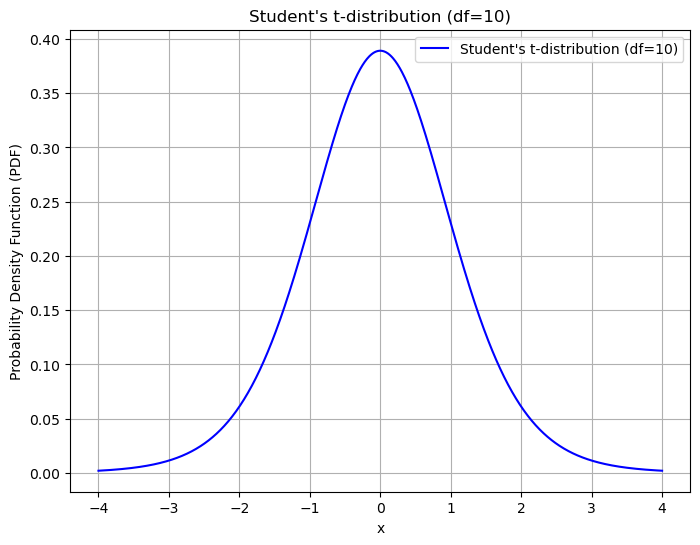

In [5]:
# Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.
# Ans)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Degrees of freedom
df = 10

# Generate x values for the plot
x = np.linspace(-4, 4, 1000)  # Range typically covers from -4 to 4 for t-distribution

# Calculate the corresponding probability density function (PDF) values
pdf = t.pdf(x, df)

# Plotting the t-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Student\'s t-distribution (df={df})', color='blue')
plt.title(f'Student\'s t-distribution (df={df})')
plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.
# Ans)

import numpy as np
from scipy import stats

def two_sample_t_test(sample1, sample2, alpha=0.05):
    # Convert samples to numpy arrays
    sample1 = np.array(sample1)
    sample2 = np.array(sample2)
    
    # Calculate sample sizes
    n1 = len(sample1)
    n2 = len(sample2)
    
    # Calculate means and variances
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)
    
    # Calculate pooled standard deviation (assuming equal variances)
    pooled_std = np.sqrt((var1 + var2) / 2)
    
    # Calculate t-statistic
    t_statistic = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))
    
    # Degrees of freedom
    df = n1 + n2 - 2
    
    # Calculate p-value
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=df))
    
    return t_statistic, p_value

# Generate two random samples of equal size
np.random.seed(0)  # for reproducibility
sample1 = np.random.normal(loc=10, scale=2, size=30)
sample2 = np.random.normal(loc=10.5, scale=2, size=30)

# Perform two-sample t-test
t_stat, p_val = two_sample_t_test(sample1, sample2)

# Print the results
print(f"Sample 1 Mean: {np.mean(sample1):.2f}, Sample 2 Mean: {np.mean(sample2):.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Determine significance based on p-value and alpha
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is sufficient evidence that the population means are different.")
else:
    print("Fail to reject the null hypothesis. There is not sufficient evidence that the population means are different.")


Sample 1 Mean: 10.89, Sample 2 Mean: 9.92
T-statistic: 1.8469
P-value: 0.0699
Fail to reject the null hypothesis. There is not sufficient evidence that the population means are different.


Q11: What is Student’s t distribution? When to use the t-Distribution.
Ans)

Student’s t distribution, often simply called the t-distribution, is a probability distribution that arises in hypothesis testing when the sample size is small and/or the population standard deviation is unknown. It is similar to the standard normal distribution but has heavier tails, which makes it suitable for situations where the sample size is small and the underlying population distribution is assumed to be normal.

When to use it:
1. Small Sample Sizes: When the sample size n is small (typically less than 30), the t-distribution is used because it provides better approximations to the sampling distribution of the sample mean compared to the standard normal distribution.

2. Unknown Population Standard Deviation: When the population standard deviation σ is unknown and estimated using the sample standard deviation s, the t-distribution is used to account for the additional uncertainty introduced by this estimation.
    

Q11: What is Student’s t distribution? When to use the t-Distribution.
ans)

Student's t-distribution, often simply referred to as the t-distribution, is a probability distribution that is symmetric and bell-shaped, much like the normal distribution. It is widely used in statistics when dealing with small sample sizes and situations where the population standard deviation is unknown.

When to Use the t-Distribution:
    1. Sample Size: Use the t-distribution when the sample size is small (typically less than 30). For larger sample sizes, the t-distribution approaches the standard normal distribution.

    2. Unknown Population Standard Deviation: When the population standard deviation is unknown and must be estimated from the sample data, the t-distribution should be used instead of the normal distribution.

Q12: What is t-statistic? State the formula for t-statistic

ans)
The t-statistic, also known as the t-value or t-score, is a measure used in hypothesis testing to determine if there is a significant difference between the means of two groups. It is calculated based on sample data and is compared to a critical value from the t-distribution to make inferences about the population.

State the formula for t-Statistic:
The formula for the t-statistic depends on whether you are comparing means of two independent samples or testing a sample mean against a population mean.

In [5]:
''' Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random 
sample of 50 days and find the sample mean revenue to be $500 with a standard deviation of $50. 
Estimate the population mean revenue with a 95% confidence interval.

Ans)
'''
import scipy.stats as stats
import math


sample_mean = 500  # Sample mean revenue ($)
sample_std_dev = 50  # Sample standard deviation ($)
sample_size = 50  # Sample size

# Calculating the critical value from t-distribution for 95% confidence level
alpha = 0.05  # Significance level (1 - confidence level)
degrees_of_freedom = sample_size - 1
t_critical = stats.t.ppf(1 - alpha/2, df=degrees_of_freedom)

# Calculating margin of error
margin_of_error = t_critical * (sample_std_dev / math.sqrt(sample_size))

# Calculating confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error


print(f"Sample Mean: ${sample_mean}")
print(f"Sample Standard Deviation: ${sample_std_dev}")
print(f"Sample Size: {sample_size}")
print(f"95% Confidence Interval for Population Mean Revenue: (${lower_bound:.2f}, ${upper_bound:.2f})")


Sample Mean: $500
Sample Standard Deviation: $50
Sample Size: 50
95% Confidence Interval for Population Mean Revenue: ($485.79, $514.21)


In [6]:
'''
Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a 
clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a 
standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

Ans)
'''

import math


sample_mean = 8  # Sample mean decrease in blood pressure (mmHg)
pop_mean_hypothesis = 10  # Hypothesized population mean decrease in blood pressure (mmHg)
sample_std_dev = 3  # Sample standard deviation (mmHg)
sample_size = 100  # Sample size
alpha = 0.05  # Significance level

# Calculating the test statistic (z-score)
z = (sample_mean - pop_mean_hypothesis) / (sample_std_dev / math.sqrt(sample_size))

# Find the critical value from standard normal distribution for one-tailed test (left-tail)
z_critical = -1.645  # For alpha = 0.05, one-tailed test


print(f"Test Statistic (z-score): {z:.2f}")
print(f"Critical Value: {z_critical}")

if z < z_critical:
    print("Reject Null Hypothesis: The new drug decreases blood pressure by less than 10 mmHg.")
else:
    print("Do Not Reject Null Hypothesis: There is not enough evidence to conclude that the new drug decreases blood pressure by less than 10 mmHg.")




Test Statistic (z-score): -6.67
Critical Value: -1.645
Reject Null Hypothesis: The new drug decreases blood pressure by less than 10 mmHg.


In [7]:
''''
Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a 
standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight 
is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 
pounds with a significance level of 0.01.

Ans)

'''
import math


population_mean = 5  # Population mean weight (pounds)
population_std_dev = 0.5  # Population standard deviation (pounds)
sample_size = 25  # Sample size
sample_mean = 4.8  # Sample mean weight (pounds)
alpha = 0.01  # Significance level

# Calculating the test statistic (z-score)
z = (sample_mean - population_mean) / (population_std_dev / math.sqrt(sample_size))
z_critical = -2.33  # For alpha = 0.01, one-tailed test

# Print test statistic and critical value
print(f"Test Statistic (z-score): {z:.2f}")
print(f"Critical Value: {z_critical}")

# Compare test statistic with critical value
if z < z_critical:
    print("Reject Null Hypothesis: The true mean weight of the products is less than 5 pounds.")
else:
    print("Do Not Reject Null Hypothesis: There is not enough evidence to conclude that the true mean weight of the products is less than 5 pounds.")



Test Statistic (z-score): -2.00
Critical Value: -2.33
Do Not Reject Null Hypothesis: There is not enough evidence to conclude that the true mean weight of the products is less than 5 pounds.


In [9]:
'''
Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 
30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean 
score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two 
groups are equal with a significance level of 0.01

Ans)

'''
import math


mean1 = 80  # Sample mean for group 1
std_dev1 = 10  # Sample standard deviation for group 1
n1 = 30  # Sample size for group 1

mean2 = 75  # Sample mean for group 2
std_dev2 = 8  # Sample standard deviation for group 2
n2 = 40  # Sample size for group 2

alpha = 0.01  # Significance level

# Calculating the two-sample t-statistic assuming unequal variances (Welch's t-test)
numerator = mean1 - mean2
denominator = math.sqrt((std_dev1**2 / n1) + (std_dev2**2 / n2))
t = numerator / denominator

# Degrees of freedom approximation for Welch's t-test
df_num = ((std_dev1**2 / n1) + (std_dev2**2 / n2))**2
df_denom = ((std_dev1**2 / n1)**2 / (n1 - 1)) + ((std_dev2**2 / n2)**2 / (n2 - 1))
df = df_num / df_denom

# Critical value from t-distribution for two-tailed test
t_critical = abs(stats.t.ppf(alpha / 2, df))

print(f"Test Statistic (t-score): {t:.2f}")
print(f"Critical Value: ±{t_critical:.2f}")

# Compare test statistic with critical value
if abs(t) > t_critical:
    print("Reject Null Hypothesis: The population means of the two groups are not equal.")
else:
    print("Do Not Reject Null Hypothesis: There is not enough evidence to conclude that the population means of the two groups are different.")



Test Statistic (t-score): 2.25
Critical Value: ±2.67
Do Not Reject Null Hypothesis: There is not enough evidence to conclude that the population means of the two groups are different.


In [10]:
'''
Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV 
program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard 
deviation of 1.5. Estimate the population mean with a 99% confidence interval

Ans)
'''

import scipy.stats as stats
import math

sample_mean = 4  # Sample mean number of ads watched
sample_std_dev = 1.5  # Sample standard deviation
sample_size = 50  # Sample size
confidence_level = 0.99  # 99% confidence interval

# Calculating the critical value (t-score) for 99% confidence level
alpha = 1 - confidence_level
df = sample_size - 1
t_critical = stats.t.ppf(1 - alpha / 2, df)

# Calculating the margin of error
margin_of_error = t_critical * (sample_std_dev / math.sqrt(sample_size))

# Calculating confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std_dev}")
print(f"Sample Size: {sample_size}")
print(f"99% Confidence Interval for Population Mean: ({lower_bound:.3f}, {upper_bound:.3f})")


Sample Mean: 4
Sample Standard Deviation: 1.5
Sample Size: 50
99% Confidence Interval for Population Mean: (3.431, 4.569)
